#### Objective: This project analyzes the relationship between population growth, net migration, and GDP per capita across global regions over time. The goal is to understand how economic conditions and demographic changes influence migration patterns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# skiprows=4 is non-negotiable, World Bank puts metadata poetry in the first rows.
pop=pd.read_csv("population.csv" ,skiprows=4 )
mig=pd.read_csv("migration.csv" ,skiprows=4)
gdp=pd.read_csv("gdp.csv",skiprows=4)

##### Data Preparation: Population Data

In [3]:
pop.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='str')

In [6]:
pop.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024                1
Unnamed: 69       266
Length: 70, dtype: int64

In [18]:
years=[str(year) for year in range(1961,2020)]
base_cols=['Country Name', 'Country Code']

In [21]:
pop_sub=pop[base_cols + years]

In [26]:
# Reshape to long format
pop_long=pop_sub.melt(
    id_vars=base_cols, 
    var_name='Year', 
    value_name= 'Population'
)

##### Data Preparation: Migration Data

In [8]:
mig.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='str')

In [14]:
mig.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                1
                 ... 
2021                1
2022                1
2023                1
2024                1
Unnamed: 69       266
Length: 70, dtype: int64

In [22]:
years = [str(year) for year in range(1961, 2021)]
base_cols = ['Country Name', 'Country Code']

In [23]:
mig_sub = mig[base_cols + years]

In [31]:
# Reshape to long format
mig_long= mig_sub.melt(
    id_vars=base_cols,
    var_name='Year',
    value_name='Net_Migration'
)

##### Data Preparation: GDP Data

In [15]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='str')

In [17]:
gdp.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              115
                 ... 
2021                8
2022                9
2023               15
2024               26
Unnamed: 69       266
Length: 70, dtype: int64

In [24]:
years = [str(year) for year in range(1961, 2021)]
base_cols = ['Country Name', 'Country Code']

In [25]:
gdp_sub = gdp[base_cols + years]

In [28]:
# Reshape to long format
gdp_long = gdp_sub.melt(
    id_vars=base_cols,
    var_name='Year',
    value_name='GDP_per_Capita'
)

##### Datasets were subset to years 1961–2020 to ensure temporal alignment across indicators. Data was reshaped into long format to support multi-variable analysis and cross-country comparison.

In [32]:
# Merge them all together
df = pop_long.merge(
    mig_long,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
).merge(
    gdp_long,
    on=['Country Name', 'Country Code', 'Year'],
    how='inner'
)

In [33]:
df.shape

(15694, 6)

In [34]:
df.isnull().sum()

Country Name         0
Country Code         0
Year                 0
Population          88
Net_Migration       59
GDP_per_Capita    2548
dtype: int64

In [37]:
df_clean = df.dropna(subset=['Population', 'Net_Migration', 'GDP_per_Capita'])

In [39]:
df_clean.isnull().sum()

Country Name      0
Country Code      0
Year              0
Population        0
Net_Migration     0
GDP_per_Capita    0
dtype: int64

In [40]:
df_clean['Year'] = df_clean['Year'].astype(int)

##### Exploratory Data Analysis

In [43]:
df_clean.describe()

,Year,Population,Net_Migration,GDP_per_Capita
count,13146.000000,1.314600e+04,1.314600e+04,13146.000000
mean,1992.621558,2.478599e+08,-6.763714e+04,7818.500145
std,16.535123,7.435710e+08,6.437199e+05,15890.771275
min,1961.000000,5.663000e+03,-6.387633e+06,11.801322
25%,1979.000000,1.788336e+06,-3.437475e+04,540.133795
50%,1994.000000,8.742006e+06,-1.713000e+03,1732.264324
75%,2007.000000,6.704361e+07,9.646750e+03,7102.028247
max,2019.000000,7.778009e+09,6.415028e+06,204263.797114


In [ ]:
# Global population over time
global_pop=df_clean.groupby('Year')['Population'].sum().reset_index()
global_pop.head()

,Year,Population
0,1961,2.969432e+10
1,1962,3.024466e+10
2,1963,3.092831e+10
3,1964,3.161780e+10
4,1965,3.232105e+10


<Axes: title={'center': 'Global Population Growth (1961–2020)'}>

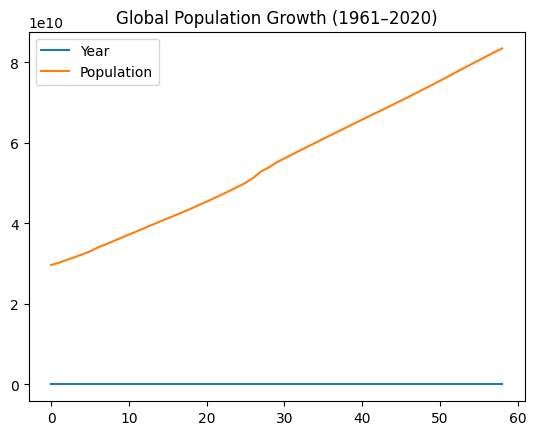

In [47]:
global_pop.plot(title='Global Population Growth (1961–2020)')

##### Observation and Insight: Population growth varies significantly across regions, with some regions experiencing rapid growth while others remain relatively stable.
##### Interpretation: Population size alone does not explain migration patterns, suggesting that other economic or social factors may play a stronger role.
##### Why this matters: Understanding population trends provides context for analyzing whether migration is driven by demographic pressure or external opportunities.

In [48]:
# Global net migration over time
global_mig=df_clean.groupby('Year')['Net_Migration'].sum().reset_index()
global_mig.head()

,Year,Net_Migration
0,1961,-2128544.0
1,1962,-2798507.0
2,1963,-2724685.0
3,1964,-10777677.0
4,1965,-4853403.0


<Axes: title={'center': 'Global Net Migration Over Time'}>

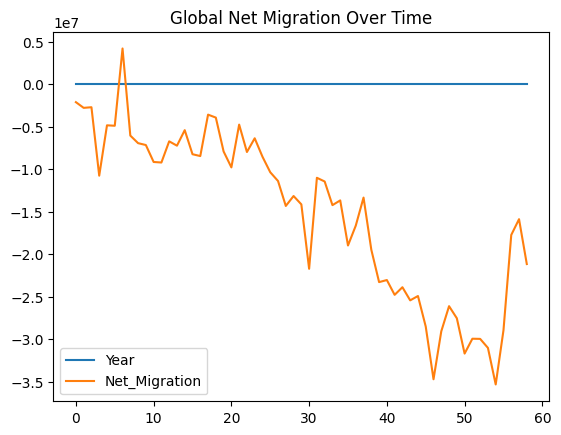

In [49]:
global_mig.plot(title='Global Net Migration Over Time')

##### Observation and Insight: Net migration values show that some regions consistently lose population while others gain.
##### Interpretation: This indicates the presence of push and pull factors influencing migration beyond natural population growth.
##### Why this matters: Identifying migration trends helps reveal which regions are economically or socially attractive to people.

<Axes: title={'center': 'GDP per Capita vs Net Migration'}, xlabel='GDP_per_Capita', ylabel='Net_Migration'>

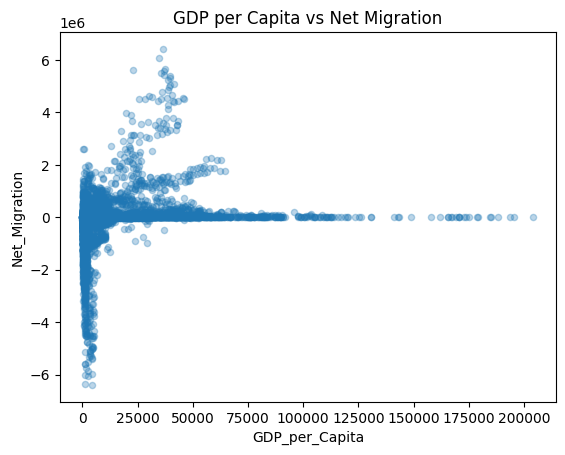

In [50]:
# GDP vs Migration
df_clean.plot.scatter(
    x='GDP_per_Capita',
    y='Net_Migration',
    alpha=0.3,
    title='GDP per Capita vs Net Migration'
)

##### Regional Comparison

In [52]:
south_asia = ['PAK', 'IND', 'BGD', 'LKA', 'NPL']
sa_df = df_clean[df_clean['Country Code'].isin(south_asia)]

<Axes: title={'center': 'Population Growth in South Asia'}, xlabel='Year'>

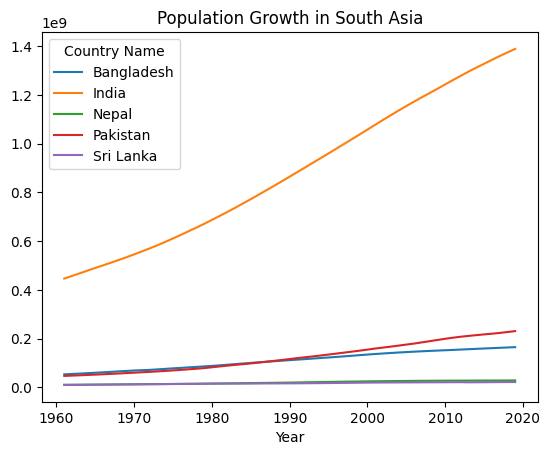

In [53]:
# Population trend
sa_df.groupby(['Year','Country Name'])['Population'].sum().unstack().plot(
    title='Population Growth in South Asia'
)

<Axes: title={'center': 'Net Migration in South Asia'}, xlabel='Year'>

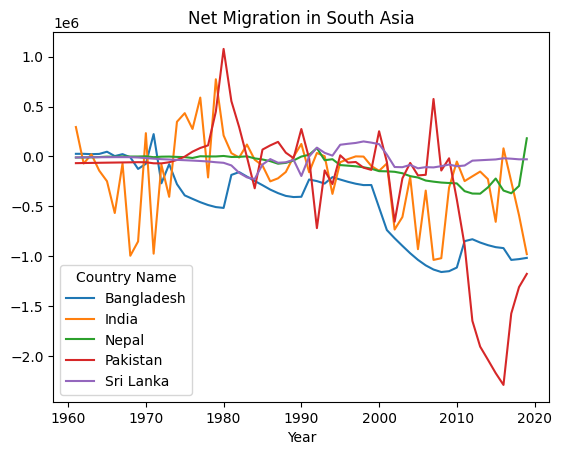

In [54]:
# Migration trend
sa_df.groupby(['Year','Country Name'])['Net_Migration'].sum().unstack().plot(
    title='Net Migration in South Asia'
)

##### Observation and Insight: When combining population, migration, and GDP data, patterns begin to emerge showing how economic strength relates to migration behavior.
##### Interpretation: Regions with stronger economic indicators tend to retain or attract population, while weaker economies show outward migration.
##### Why this matters: This suggests that economic opportunity is a key driver of migration decisions.

##### Correlation Analysis

In [55]:
corr_matrix = df_clean[['Population', 'Net_Migration', 'GDP_per_Capita']].corr()
corr_matrix

,Population,Net_Migration,GDP_per_Capita
Population,1.000000,-0.434324,-0.075506
Net_Migration,-0.434324,1.000000,0.182203
GDP_per_Capita,-0.075506,0.182203,1.000000


In [ ]:
# check decades
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

df_clean.groupby('Decade')[['GDP_per_Capita','Net_Migration']].corr()

GDP_per_Capita  Net_Migration
Decade                                              
1960   GDP_per_Capita        1.000000       0.299918
       Net_Migration         0.299918       1.000000
1970   GDP_per_Capita        1.000000       0.187081
       Net_Migration         0.187081       1.000000
1980   GDP_per_Capita        1.000000       0.205514
       Net_Migration         0.205514       1.000000
1990   GDP_per_Capita        1.000000       0.214962
       Net_Migration         0.214962       1.000000
2000   GDP_per_Capita        1.000000       0.218897
       Net_Migration         0.218897       1.000000
2010   GDP_per_Capita        1.000000       0.212905
       Net_Migration         0.212905       1.000000

##### Correlation Interpretation: The correlation between GDP per capita and net migration suggests a relationship between economic prosperity and migration trends.
##### Interpretation: As GDP per capita increases, regions tend to experience lower migration loss or higher migration gain.
##### Limitation: Correlation does not imply causation, and other political or social factors may also influence migration.

#### Key Findings:
##### Population growth alone does not determine migration patterns
##### Regions with higher GDP per capita tend to experience lower outward migration
##### Economic opportunity appears to be a stronger driver of migration than demographic size
##### Conclusion: This analysis demonstrates how combining demographic and economic data can reveal meaningful insights about global migration patterns. It highlights the importance of economic development in influencing where people choose to live.